<a href="https://colab.research.google.com/github/bdadeveloper1/MachineLearningProjects/blob/main/Final_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSE 708: Data Analytics & Engineering Applications
#North Carolina A & T State University
#Final Class Project
#Intelligent System for Skin Image Classification using Machine Learning
By Brandon Oppong-Antwi


In [ ]:
!pip install sklearn

Important Notes on Installations used for Model

Python Version: Python 3.8.3

Tensorflow Version: Tensorflow 2.3.0

Pytorch Version Pytorch 1.6.0 with CUDA 101

Operation System: Windows 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Read csv file from data frame from txt file
skin = pd.read_csv("Skin_NonSkin.txt", delimiter="\t", names=("R", "G", "B", "skin_nonskin")) # 1=nonSkin , 2=skin
skin.tail() #used

,R,G,B,skin_nonskin
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2
245056,255,255,255,2


In [ ]:
# replace values in skin_nonskin column for interpretability
for i in skin["skin_nonskin"]: # skin = 0 , non-skin = 1
    if i == 2:
        skin.replace(to_replace=[2], value=[0], inplace=True) 

In [ ]:
skin.tail()

,R,G,B,skin_nonskin
245052,163,162,112,0
245053,163,162,112,0
245054,163,162,112,0
245055,163,162,112,0
245056,255,255,255,0


In [ ]:
skin['skin_nonskin'].value_counts()

0    194198
1     50859
Name: skin_nonskin, dtype: int64

In [ ]:
len(skin)

245057

In [ ]:
skin.describe()

,R,G,B,skin_nonskin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.055008,132.498953,123.163284,0.207539
std,62.276451,59.959565,72.585507,0.405546
min,0.000000,0.000000,0.000000,0.000000
25%,68.000000,87.000000,70.000000,0.000000
50%,139.000000,153.000000,128.000000,0.000000
75%,176.000000,177.000000,164.000000,0.000000
max,255.000000,255.000000,255.000000,1.000000


## Phase 2- Pre-Processing and Data Visualization:

Text(0.5, 0, 'B')

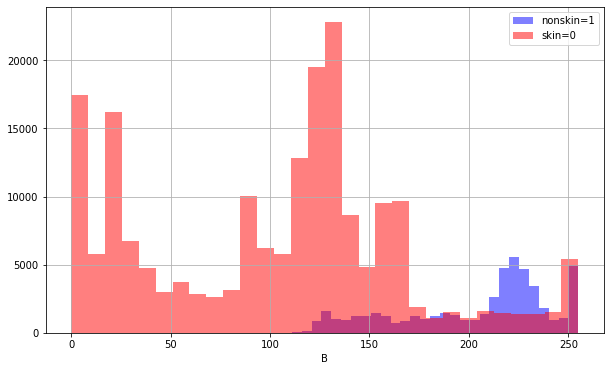

In [ ]:
# bar plot for B values
plt.figure(figsize=(10,6))
skin[skin["skin_nonskin"]==1]["B"].hist(alpha=0.5, color="blue", bins=30, label="nonskin=1" )
skin[skin["skin_nonskin"]==0]["B"].hist(alpha=0.5, color="red", bins=30, label="skin=0" )
plt.legend()
plt.xlabel("B")

Text(0.5, 0, 'R')

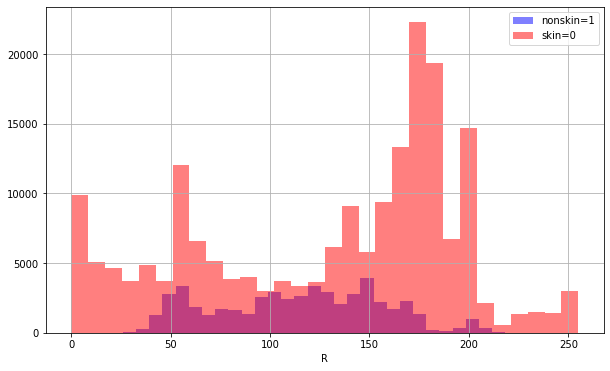

In [ ]:
# bar plot for R values
plt.figure(figsize=(10,6))
skin[skin["skin_nonskin"]==1]["R"].hist(alpha=0.5, color="blue", bins=30, label="nonskin=1" )
skin[skin["skin_nonskin"]==0]["R"].hist(alpha=0.5, color="red", bins=30, label="skin=0" )
plt.legend()
plt.xlabel("R")

Text(0.5, 0, 'G')

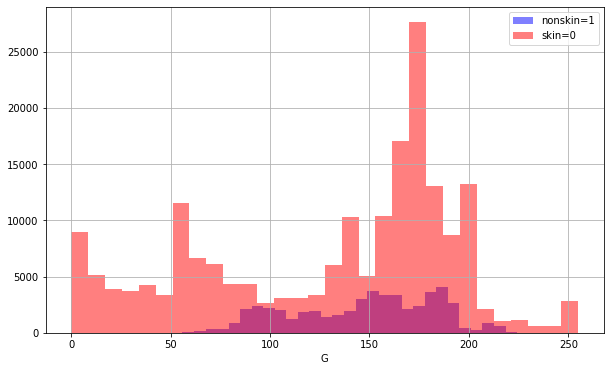

In [ ]:
# bar plot for G values
plt.figure(figsize=(10,6))
skin[skin["skin_nonskin"]==1]["G"].hist(alpha=0.5, color="blue", bins=30, label="nonskin=1" )
skin[skin["skin_nonskin"]==0]["G"].hist(alpha=0.5, color="red", bins=30, label="skin=0" )
plt.legend()
plt.xlabel("G")

In [ ]:
skin["skin_nonskin"].value_counts()

0    194198
1     50859
Name: skin_nonskin, dtype: int64

1 is non skin and 0 is skin. From this we can see that our dataset is unbalanced. The skin data is way more higher than non skin. 

# Dataset Cleaning  
Clean your data. See Hands-on Machine Learning with ScikitLearn &
TensorFlow (Pages 59-66)  
Describe how you have handled the outliers if there exists any.

## Find outliers

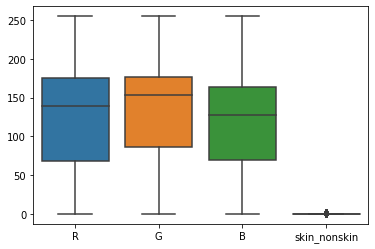

In [ ]:
sns.boxplot(data=skin)# we can see no data outside the range of 0 -250

In [ ]:
anomalies = []
# Function to Detection Outlier on one-dimentional datasets.
def findOutliers(data):
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    cut_off = data_std * 3
    
    lower_limit  = data_mean - cut_off 
    upper_limit = data_mean + cut_off
#     print(lower_limit)
    # Generate outliers
    for x in data:
        if x > upper_limit or x < lower_limit:
            anomalies.append(x)
    return anomalies



In [ ]:
findOutliers(skin["B"])

[]

In [ ]:
findOutliers(skin["R"])

[]

In [ ]:
findOutliers(skin["G"])

[]

The predictiors don't exist any outliers.

## Pre- Processing

### Train_Test_Split  
regular data. 

In [ ]:
X= skin[['B', "R", 'G']]
y = skin["skin_nonskin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Data Normalization   
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance) . From:https://scikit-learn.org/

In [ ]:


import sklearn.linear_model as sk

from sklearn.preprocessing import StandardScaler # Standardized  the predictors
from sklearn.ensemble.forest import RandomForestClassifier
scaler = StandardScaler()
d = skin.drop("skin_nonskin", axis=1)
scaler.fit(d)
scaled_features= scaler.transform(d)
skindf = pd.DataFrame(scaled_features, columns = skin.columns[:-1])
skindf.head()

ImportError: ignored

In [ ]:
max(skindf.B)

1.8162990060736706

In [ ]:
min(skindf.B)

-1.6968061608211427

In [ ]:
# create scaled data set
y = skin["skin_nonskin"]
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(skindf,y, test_size=0.3, random_state=101)

# Feature Extraction  
Extract (eliminate) features using different methods we learned in class

In [ ]:
# feature evaluation
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rfc2.fit(X,y)
rfc2.feature_importances_

array([0.55058482, 0.21722656, 0.23218861])

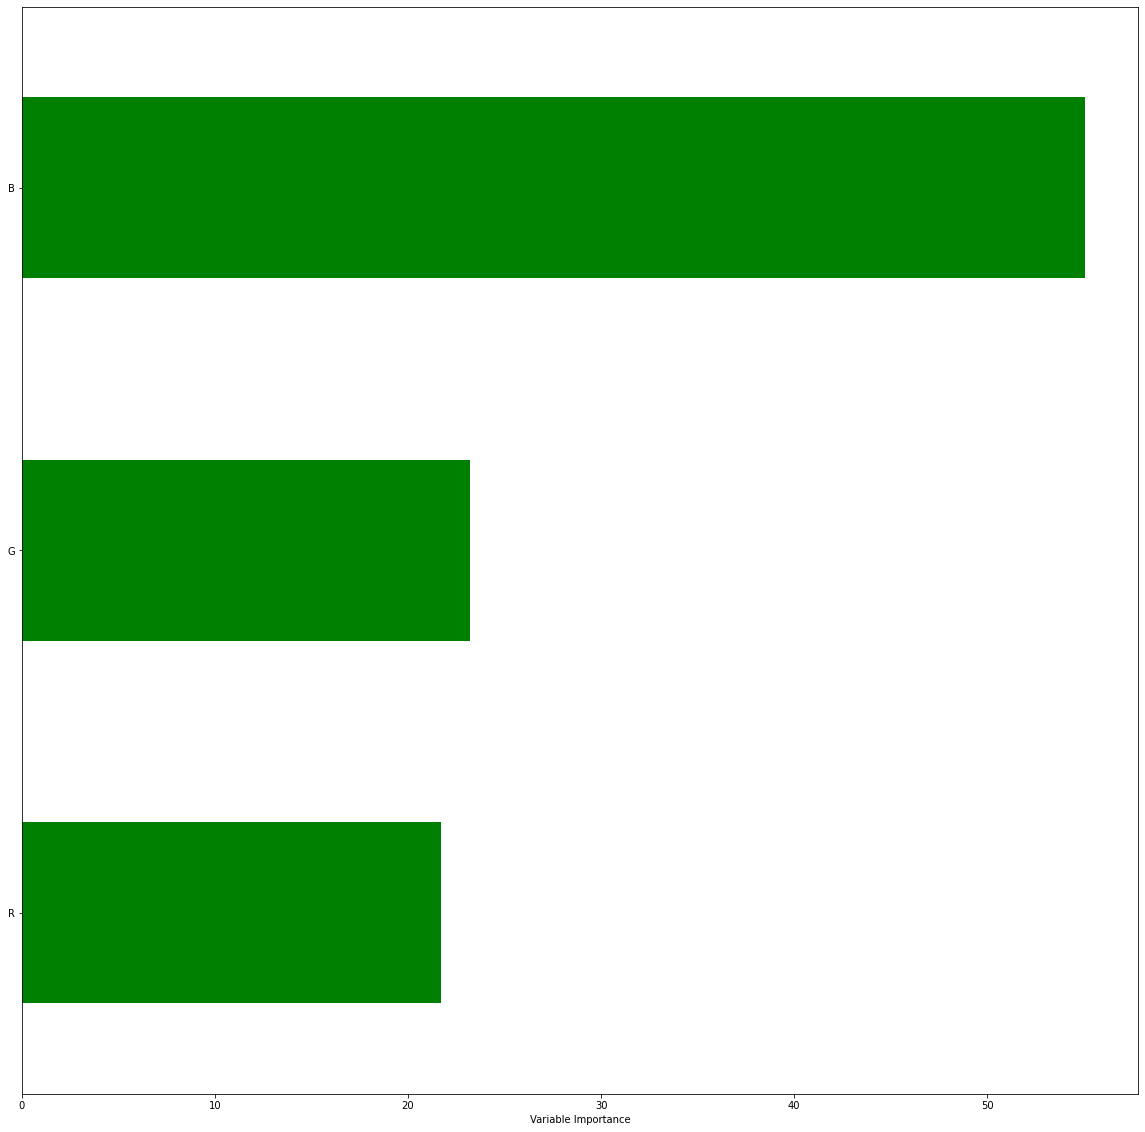

In [ ]:
Importance = pd.DataFrame({'Importance':rfc2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='green', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Model Development (4 models)  
Select and train at least FOUR different classification models (models should
be part of course syllabus, see the list below for possible models).

### Logistic Regression

without normalization 

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
fit_model = logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)
print(classification_report(y_test,log_predictions))
print(confusion_matrix(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58341
           1       0.79      0.83      0.81     15177

    accuracy                           0.92     73518
   macro avg       0.87      0.89      0.88     73518
weighted avg       0.92      0.92      0.92     73518

[[55077  3264]
 [ 2641 12536]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)

0.9196795342637177

The test result from the output of normalized data and without normalized data are exactly the same. 

### KNN

[link text](https://)Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance) . From:https://scikit-learn.org/

In [ ]:
# KNN model
error_rate1=[]  # choose the best k within 1 to 20
for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate1.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

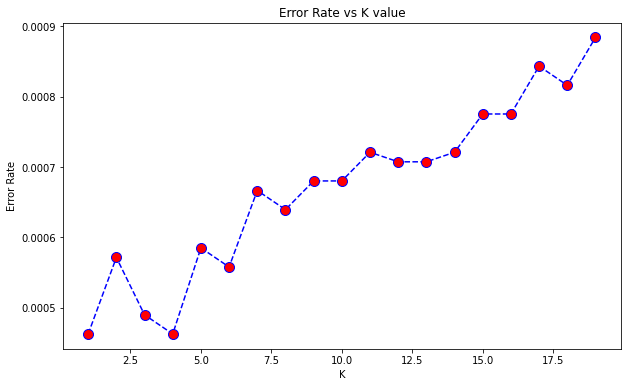

In [ ]:
# Evaluate KNN alternative values
plt.figure(figsize=(10,6)) 
plt.plot(range(1,20), error_rate1, color="blue", lineStyle="dashed",marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

From the plot we can see that K=1 is the best which provide the lowest error rate. As the K neighobour is bigger the error rate is higher.

In [ ]:
# k = 1
knn= KNeighborsClassifier(n_neighbors= 1) 
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test,knn_pred))

[[58316    25]
 [    9 15168]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [ ]:
# k = 3
knn3= KNeighborsClassifier(n_neighbors= 3) 
knn3.fit(scaled_X_train,scaled_y_train)
knn3_pred = knn3.predict(scaled_X_test)
print(confusion_matrix(scaled_y_test, knn3_pred))
print(classification_report(scaled_y_test,knn3_pred))

[[58309    32]
 [    5 15172]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision tree model
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_preds= dtree.predict(X_test)
print(confusion_matrix(y_test, tree_preds))
print(classification_report(y_test, tree_preds))

[[58309    32]
 [   40 15137]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



##### used scaled values 

In [ ]:
dtree= DecisionTreeClassifier()
dtree.fit(scaled_X_train, scaled_y_train)
scaled_tree_preds= dtree.predict(scaled_X_test)
print(confusion_matrix(scaled_y_test, scaled_tree_preds))
print(classification_report(scaled_y_test, scaled_tree_preds))

[[58312    29]
 [   39 15138]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [ ]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree


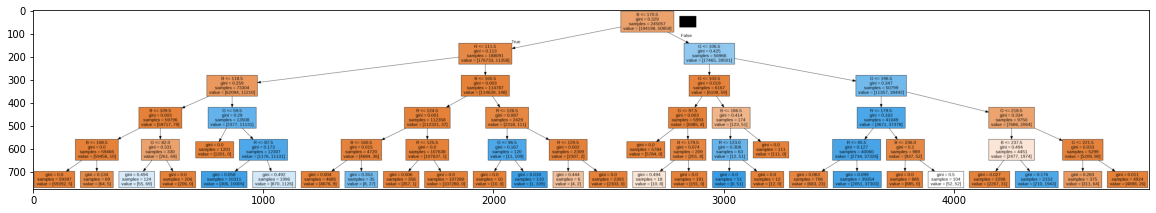

In [ ]:
# Graphviz vizualiation
dtc = DecisionTreeClassifier(max_depth=5) # draw decision tree  using DecisionTree Classifier
dtc.fit(X, y)
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=list(X.columns.values), class_names=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('dec_tree_depth5.png')
img = plt.imread('dec_tree_depth5.png')
plt.rcParams["figure.figsize"] = (20, 20)
plt.imshow(img)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Model  B = 50
rfc= RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[58316    25]
 [    8 15169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [ ]:
# Random Forest model B = 100
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[58317    24]
 [    9 15168]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



## SVM

In [ ]:
# SVM model
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Confusion Matrix for 3 predictor  SVM")
print(confusion_matrix(y_test, svc_pred))
print("====================================")
print("Classification_report for 3 predictor SVM")
print(classification_report(y_test, svc_pred))

Confusion Matrix for 3 predictor  SVM
[[58209   132]
 [    1 15176]]
Classification_report for 3 predictor SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       0.99      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
folds = 5
kf = KFold(n_splits=folds,shuffle=True)

In [ ]:
logmodel = LogisticRegression()#  k-fold cross validation for Logistic Regression
log_kfscore = cross_val_score(logmodel,X,y,cv=kf, scoring = "accuracy").mean()
log_kfscore

0.9188147948532477

In [ ]:
#  k-fold cross validation KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn_kfscore = cross_val_score(knn,X,y,cv=kf, scoring = "accuracy").mean()
knn_kfscore

0.9995878502903484

In [ ]:
rfc= RandomForestClassifier(n_estimators=100)#  k-fold cross validation for Random Forest 
rfc_kfscore = cross_val_score(rfc,X,y,cv=kf, scoring = "accuracy").mean()
rfc_kfscore

0.9995592861069269

In [ ]:
svc = SVC(decision_function_shape='ovo') # k-fold cross validation fro SVM
knn_kfscore = cross_val_score(knn,X,y,cv=kf, scoring = "accuracy").mean()
knn_kfscore

0.9995796890237199

In [ ]:
cv = {}

#### ROC curve

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

logreg = logmodel.fit(X_train, y_train).predict_proba(X_test) 
fpr1, tpr1, threshold = metrics.roc_curve(y_test, logreg[:, 1])
roc_auc1 = metrics.auc(fpr1, tpr1)

knnprob = knn.fit(X_train, y_train).predict_proba(X_test) 
fpr2, tpr2, threshold = metrics.roc_curve(y_test, knnprob[:, 1])
roc_auc2 = metrics.auc(fpr2, tpr2)

rfcprob = rfc.fit(X_train, y_train).predict_proba(X_test) 
fpr3, tpr3, threshold = metrics.roc_curve(y_test, rfcprob[:, 1])
roc_auc3 = metrics.auc(fpr3, tpr3)

clf=SVC(probability=True)
svcprob = clf.fit(X_train, y_train).predict_proba(X_test) 
fpr4, tpr4, threshold = metrics.roc_curve(y_test, svcprob[:, 1])
roc_auc4 = metrics.auc(fpr4, tpr4)


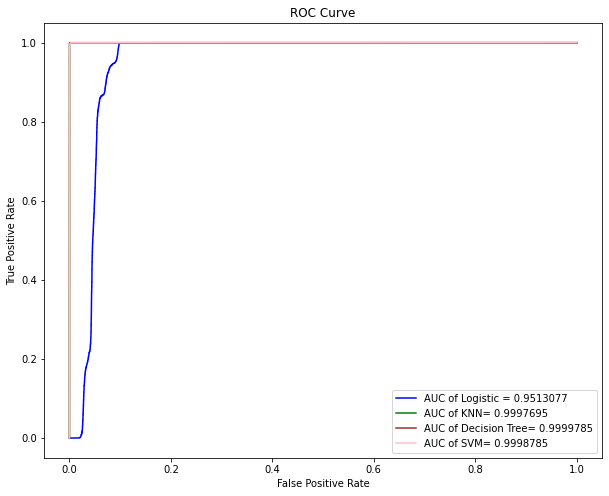

In [ ]:
plt.figure(figsize=(10,8))
plt.title('ROC Curve')
plt.plot(fpr1, tpr1, 'b', label = 'AUC of Logistic = %0.7f' % roc_auc1) 
plt.plot(fpr2, tpr2,  'g', label = 'AUC of KNN= %0.7f' % roc_auc2)
plt.plot(fpr3, tpr3, 'brown',  label = 'AUC of Decision Tree= %0.7f' % roc_auc3)
plt.plot(fpr4, tpr4, 'pink', label = 'AUC of SVM= %0.7f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Fine-tune your models & Feature Set:
Evaluate your models using test set. Fine-tune your model, and optimize
feature set.

##### After Normalization(logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
fit_model = logmodel.fit(scaled_X_train,scaled_y_train)
scaled_pred = logmodel.predict(scaled_X_test)
print(classification_report(scaled_y_test,scaled_pred))
print(confusion_matrix(scaled_y_test,scaled_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58341
           1       0.79      0.83      0.81     15177

    accuracy                           0.92     73518
   macro avg       0.87      0.89      0.88     73518
weighted avg       0.92      0.92      0.92     73518

[[55077  3264]
 [ 2641 12536]]


In [ ]:
error_rate=[]  # choose the best k within 1 to 20
for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,scaled_y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i !=scaled_y_test))

Text(0, 0.5, 'Error Rate')

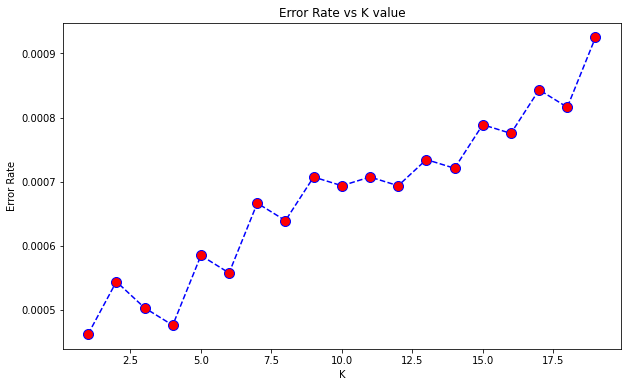

In [ ]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,20), error_rate, color="blue", lineStyle="dashed",marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
knn3= KNeighborsClassifier(n_neighbors= 3) 
knn3.fit(scaled_X_train,scaled_y_train)
knn3_pred = knn3.predict(scaled_X_test)
print(confusion_matrix(scaled_y_test, knn3_pred))
print(classification_report(scaled_y_test,knn3_pred))

[[58309    32]
 [    5 15172]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       1.00      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



# Performance:
Measure the performance of your classifiers using different metrics

In [ ]:
X1= skin[['B',  'G']]
y1 = skin["skin_nonskin"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [ ]:
X2= skin[["R", 'G']]
y2 = skin["skin_nonskin"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [ ]:
X3= skin[['B', "R"]]
y3 = skin["skin_nonskin"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=101)

### Performance testing for SVM with two predictors

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X1_train, y1_train)
svc1_pred = svc.predict(X1_test)
print("SVM Confusion Matrix for bolumn B and G")
print(confusion_matrix(y1_test, svc1_pred))
print("====================================")
print("SVM Classification_report for 3 predictor SVM")
print(classification_report(y1_test, svc1_pred))

SVM Confusion Matrix for bolumn B and G
[[57462   879]
 [   45 15132]]
SVM Classification_report for 3 predictor SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     58341
           1       0.95      1.00      0.97     15177

    accuracy                           0.99     73518
   macro avg       0.97      0.99      0.98     73518
weighted avg       0.99      0.99      0.99     73518



In [ ]:
svc.fit(X2_train, y2_train)
svc2_pred = svc.predict(X2_test)
print("Confusion Matrix for columns R and G")
print(confusion_matrix(y2_test, svc2_pred))
print("====================================")
print("Classification_report for  columns R and G")
print(classification_report(y2_test, svc_pred))

Confusion Matrix for columns R and G
[[56970  1371]
 [ 1140 14037]]
Classification_report for  columns R and G
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58341
           1       0.99      1.00      1.00     15177

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [ ]:
svc.fit(X3_train, y3_train)
svc3_pred = svc.predict(X3_test)
print("Confusion Matrix for columns R and B")
print(confusion_matrix(y3_test, svc3_pred))
print("====================================")
print("Classification_report for  columns R and B")
print(classification_report(y3_test, svc3_pred))

Confusion Matrix for columns R and B
[[56882  1459]
 [   26 15151]]
Classification_report for  columns R and B
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     58341
           1       0.91      1.00      0.95     15177

    accuracy                           0.98     73518
   macro avg       0.96      0.99      0.97     73518
weighted avg       0.98      0.98      0.98     73518



### Performance testing for KNN 3 neighbors with  2  predictors

In [ ]:
knn3= KNeighborsClassifier(n_neighbors= 3) 
knn3.fit(X1_train,y1_train)
k1_pred = knn3.predict(X1_test)
print("KNN Confusion Matrix for columns B and G")
print(confusion_matrix(y1_test, k1_pred))
print("====================================")
print("KNN Classification_report for  columns B and G")
print(classification_report(y1_test,k1_pred))

KNN Confusion Matrix for columns B and G
[[57857   484]
 [  187 14990]]
KNN Classification_report for  columns B and G
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     58341
           1       0.97      0.99      0.98     15177

    accuracy                           0.99     73518
   macro avg       0.98      0.99      0.99     73518
weighted avg       0.99      0.99      0.99     73518



In [ ]:
knn3= KNeighborsClassifier(n_neighbors= 3) 
knn3.fit(X2_train,y2_train)
k2_pred = knn3.predict(X2_test)
print("KNN Confusion Matrix for columns R and G")
print(confusion_matrix(y2_test, k2_pred))
print("====================================")
print("KNN Classification_report for  columns R and G")
print(classification_report(y2_test,k2_pred))

KNN Confusion Matrix for columns R and G
[[57148  1193]
 [  822 14355]]
KNN Classification_report for  columns R and G
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     58341
           1       0.92      0.95      0.93     15177

    accuracy                           0.97     73518
   macro avg       0.95      0.96      0.96     73518
weighted avg       0.97      0.97      0.97     73518



In [ ]:
knn3= KNeighborsClassifier(n_neighbors= 3) 
knn3.fit(X3_train,y3_train)
k3_pred = knn3.predict(X3_test)
print("KNN Confusion Matrix for columns R and B")
print(confusion_matrix(y3_test, k3_pred))
print("====================================")
print("Classification_report for  columns R and B")
print(classification_report(y3_test,k3_pred))

KNN Confusion Matrix for columns R and B
[[57787   554]
 [  342 14835]]
Classification_report for  columns R and B
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58341
           1       0.96      0.98      0.97     15177

    accuracy                           0.99     73518
   macro avg       0.98      0.98      0.98     73518
weighted avg       0.99      0.99      0.99     73518

